### PREPROCESSING & EDA

#### Importing Libraries & Data
#### Dealing with Duplicates and Nan
#### Looking at correlations(相關性)
#### Data Normalization (Plots & Tests)

### MODELING

#### Baseline Models with 10-Folds CV
#### Best Model (RandomGridSearch)
#### Prediction
#### Submission

In [1142]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

from scipy.stats import norm
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action="ignore")

In [1143]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
test_data=test_data.drop("Id",axis=1)

In [1144]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [1145]:
train_data.shape,test_data.shape

((1460, 81), (1459, 79))

In [1146]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1147]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

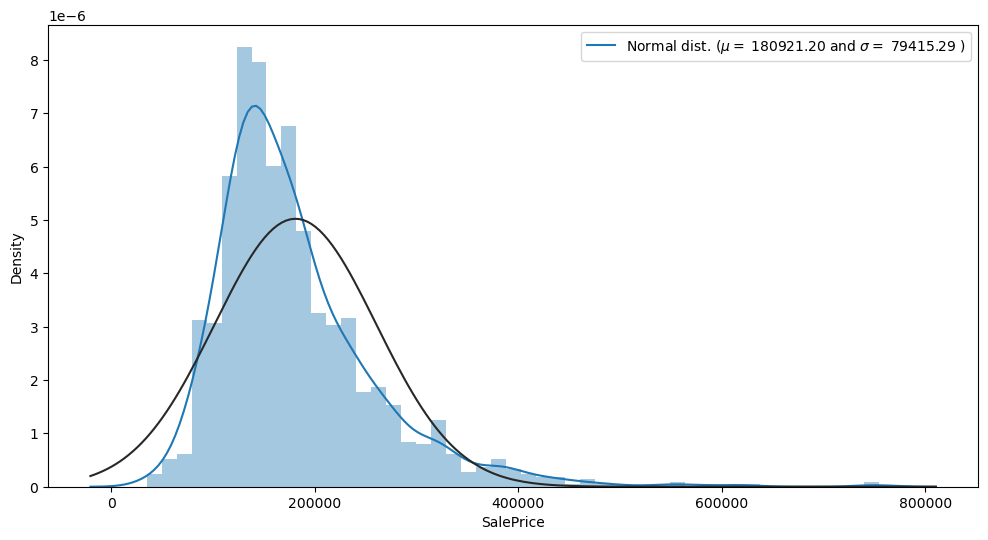

In [1148]:
#(mean,std)   去.info看
(mu,sigma)=norm.fit(train_data['SalePrice'])
# mu
plt.figure(figsize=(12,6))
sns.distplot(train_data['SalePrice'],kde=True,hist=True,fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

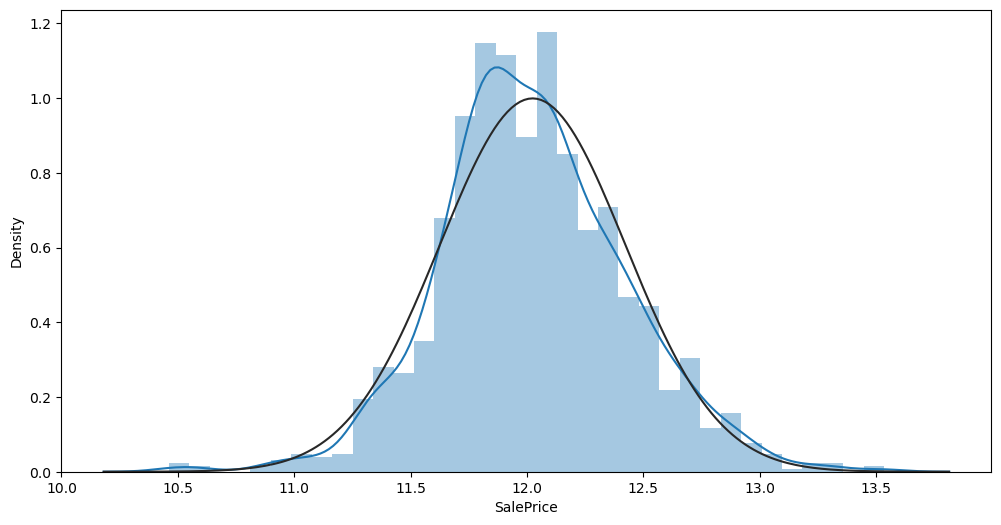

In [1149]:
train_data['SalePrice']=np.log1p(train_data['SalePrice'])
plt.figure(figsize=(12,6))
sns.distplot(train_data['SalePrice'],kde=True,hist=True,fit=norm)

In [1150]:
a=[]
a=df_train.columns
for i in a:
    if df_train[i].dtype!=object:
        kurtious=round(df_train[i].kurt(),2)
        skew=round(df_train[i].skew(),2)
        print(f"{i}  {kurtious}  {skew}")

Id  -0.62  0.93
LotFrontage  9.43  1.23
LotArea  275.64  13.12
OverallQual  0.06  0.19
OverallCond  1.48  0.57
YearBuilt  -0.51  -0.6
YearRemodAdd  -1.35  -0.45
MasVnrArea  9.46  2.62
BsmtFinSF1  1.43  0.98
BsmtFinSF2  18.83  4.15
BsmtUnfSF  0.4  0.92
TotalBsmtSF  3.71  0.67
1stFlrSF  5.08  1.26
2ndFlrSF  -0.42  0.86
LowQualFinSF  174.81  12.09
GrLivArea  2.46  1.07
BsmtFullBath  -0.74  0.62
BsmtHalfBath  14.85  3.93
FullBath  -0.54  0.17
HalfBath  -1.03  0.7
BedroomAbvGr  1.94  0.33
KitchenAbvGr  19.76  4.3
TotRmsAbvGrd  1.15  0.75
Fireplaces  0.04  0.73
GarageYrBlt  2.09  -0.4
GarageCars  0.24  -0.22
GarageArea  0.86  0.22
WoodDeckSF  6.75  1.85
OpenPorchSF  11.02  2.53
EnclosedPorch  28.36  4.0
3SsnPorch  149.3  11.38
ScreenPorch  17.76  3.95
PoolArea  327.03  17.7
MiscVal  563.69  21.95


In [1151]:
s=df_train['GrLivArea'].sort_values(ascending = False)
s.head(10)

2547    5095
1181    4476
690     4316
2186    3820
2820    3672
1168    3627
185     3608
2680    3500
304     3493
1267    3447
Name: GrLivArea, dtype: int64

In [1152]:
train_data = train_data[train_data.GrLivArea < 4500]
# train_data.iloc[[30,88,462,631,1322]]
train_data=train_data.drop(train_data.index[[30,88,462,631,1322]])

In [1153]:
df=train_data.append(test_data,ignore_index=False).reset_index()
df=df.drop("index",axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1453.0,731.015829,421.236381,1.000000,366.000000,732.000000,1095.000000,1460.000000
MSSubClass,2912.0,57.172047,42.551066,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,2426.0,69.168590,22.796944,21.000000,59.000000,68.000000,80.000000,313.000000
LotArea,2912.0,10140.661745,7813.473386,1300.000000,7466.500000,9452.500000,11557.750000,215245.000000
OverallQual,2912.0,6.087569,1.405524,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,2912.0,5.567308,1.111881,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,2912.0,1971.313187,30.272860,1872.000000,1953.750000,1973.000000,2001.000000,2010.000000
YearRemodAdd,2912.0,1984.262019,20.892776,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
MasVnrArea,2889.0,101.689166,178.520298,0.000000,0.000000,0.000000,164.000000,1600.000000
BsmtFinSF1,2911.0,439.297149,444.278401,0.000000,0.000000,368.000000,733.000000,4010.000000


In [1154]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

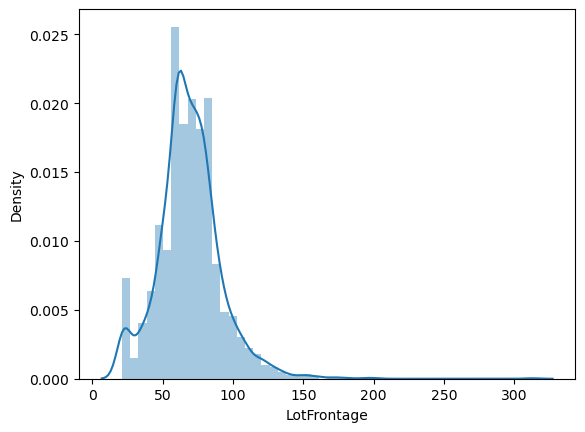

In [1155]:
sns.distplot(df.LotFrontage)

In [1156]:
df.loc[df.LotFrontage.isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8.0,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,12.206078
12,13.0,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,11.877576
14,15.0,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,11.964007
16,17.0,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,11.911708
24,25.0,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,11.944714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,NaN,20,RL,NaN,11088,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2843,NaN,60,RL,NaN,21533,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,NaN
2893,NaN,20,RL,NaN,50102,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Alloca,NaN
2894,NaN,20,RL,NaN,8098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [1157]:
df.loc[df.LotFrontage.isnull()==True,'LotFrontage']=round(df.LotFrontage.mean(),2)
df.loc[12]

Id                    13.0
MSSubClass              20
MSZoning                RL
LotFrontage          69.17
LotArea              12968
                   ...    
MoSold                   9
YrSold                2008
SaleType                WD
SaleCondition       Normal
SalePrice        11.877576
Name: 12, Length: 81, dtype: object

## 處理缺失值

In [1158]:
a=df.isnull().sum()
for value in a.items():
    if value[1]>0:
        print(value)

('Id', 1459)
('MSZoning', 4)
('Alley', 2715)
('Utilities', 2)
('Exterior1st', 1)
('Exterior2nd', 1)
('MasVnrType', 24)
('MasVnrArea', 23)
('BsmtQual', 81)
('BsmtCond', 82)
('BsmtExposure', 82)
('BsmtFinType1', 79)
('BsmtFinSF1', 1)
('BsmtFinType2', 80)
('BsmtFinSF2', 1)
('BsmtUnfSF', 1)
('TotalBsmtSF', 1)
('Electrical', 1)
('BsmtFullBath', 2)
('BsmtHalfBath', 2)
('KitchenQual', 1)
('Functional', 2)
('FireplaceQu', 1418)
('GarageType', 156)
('GarageYrBlt', 158)
('GarageFinish', 158)
('GarageCars', 1)
('GarageArea', 1)
('GarageQual', 158)
('GarageCond', 158)
('PoolQC', 2903)
('Fence', 2344)
('MiscFeature', 2807)
('SaleType', 1)
('SalePrice', 1459)


In [1159]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [1160]:
df['GarageCars'].value_counts()
df['GarageCars']=df['GarageCars'].fillna(0)

In [1161]:
#缺失大於2000
df.drop(['Utilities','Street','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.shape

(2912, 75)

In [1162]:
df['BsmtQual']=df['BsmtQual'].fillna('NA')
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')

In [1163]:
df['MasVnrType'].value_counts()

None       1739
BrkFace     877
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

In [1164]:
#1742 None 缺值補none
df.loc[df['MasVnrType'].isnull()==True,'MasVnrType']='None'

In [1165]:
df['MasVnrArea'].describe()

count    2889.000000
mean      101.689166
std       178.520298
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1166]:
#一半都是0 缺值補0
df.loc[df.MasVnrArea.isnull()==True,'MasVnrArea']=0.0
# df['MasVnrArea'].isnull().sum()

In [1167]:
df['GarageType']=df['GarageType'].fillna('NA')
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageQual']=df['GarageQual'].fillna('NA')
df['GarageCond']=df['GarageCond'].fillna('NA')

In [1168]:
df['GarageYrBlt'].median()
df.loc[df['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1979.0

In [1169]:
df.Electrical.value_counts()
df['Functional'] = df['Functional'].fillna('Typ') #空值填充为str型数据'Typ'
df['KitchenQual'] = df['KitchenQual'].fillna("TA") #
df.loc[df['Electrical'].isnull()==True,'Electrical']='SBrkr'

In [1170]:
df.loc[df['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [1171]:
#補眾數
df['Exterior1st'].mode()[0]
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [1172]:
df_train=df.drop("SalePrice",axis=1)
rem=df[["Id","SalePrice"]]
df_train=df_train.fillna(0)
df=pd.merge(df_train,rem,how="left")
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

In [1173]:
a=df.isnull().sum()
for value in a.items():
    if value[1]>0:
        print(value)

('SalePrice', 1459)


## encodeing

In [1174]:
data_object = df.select_dtypes(include = "object").columns
data_num = df.select_dtypes(include = ["int","float"]).columns
print (data_object)
print(data_num)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       

In [1175]:
from sklearn.preprocessing import LabelEncoder

for features in data_object:
    df[features] = LabelEncoder().fit_transform(df[features].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912 entries, 0 to 2911
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2912 non-null   float64
 1   MSSubClass     2912 non-null   int32  
 2   MSZoning       2912 non-null   int32  
 3   LotFrontage    2912 non-null   float64
 4   LotArea        2912 non-null   int64  
 5   LotShape       2912 non-null   int32  
 6   LandContour    2912 non-null   int32  
 7   LotConfig      2912 non-null   int32  
 8   LandSlope      2912 non-null   int32  
 9   Neighborhood   2912 non-null   int32  
 10  Condition1     2912 non-null   int32  
 11  Condition2     2912 non-null   int32  
 12  BldgType       2912 non-null   int32  
 13  HouseStyle     2912 non-null   int32  
 14  OverallQual    2912 non-null   int64  
 15  OverallCond    2912 non-null   int64  
 16  YearBuilt      2912 non-null   int64  
 17  YearRemodAdd   2912 non-null   int64  
 18  RoofStyl

In [1176]:
x=df.drop(['Id','SalePrice'],axis=1) 

In [1177]:
scaled_x=MinMaxScaler().fit_transform(x)

In [1178]:
train_df = df[df['SalePrice'].notnull()].reset_index(drop=True)
test_df = df[df['SalePrice'].isnull()]
# y=train_df['SalePrice']
# train_df=train_df.drop(["Id","SalePrice"],axis=1)
# test_df=test_df.drop(["Id","SalePrice"],axis=1)

In [1179]:
y = train_df['SalePrice']
X = train_df.drop(["Id", "SalePrice"], axis=1)

y_test = test_df['SalePrice'] 
X_test = test_df.drop(["Id", "SalePrice"], axis=1)

## Model

In [1180]:
# X_train,X_test,y_train,y_test = train_test_split(train_df,y,test_size=0,random_state=42)

In [1181]:
XGB=XGBRegressor(learning_rate=0.01,n_estimators=3460,max_depth=4, min_child_weight=1,gamma=0, subsample=0.7,colsample_bytree=0.7,objective='reg:squarederror',scale_pos_weight=1, seed=27,reg_alpha=0.00006).fit(X,y)

([<matplotlib.axis.YTick at 0x1dd103c6cd0>,
 [Text(0, 0, '3SsnPorch'),
  Text(0, 1, 'LotConfig'),
  Text(0, 2, 'Electrical'),
  Text(0, 3, 'MasVnrArea'),
  Text(0, 4, 'MSSubClass'),
  Text(0, 5, 'BsmtFinType2'),
  Text(0, 6, 'MiscVal'),
  Text(0, 7, 'BsmtUnfSF'),
  Text(0, 8, 'MasVnrType'),
  Text(0, 9, 'RoofMatl'),
  Text(0, 10, 'MoSold'),
  Text(0, 11, 'Exterior2nd'),
  Text(0, 12, 'BsmtHalfBath'),
  Text(0, 13, 'LotFrontage'),
  Text(0, 14, 'BldgType'),
  Text(0, 15, 'EnclosedPorch'),
  Text(0, 16, 'LotShape'),
  Text(0, 17, 'YrSold'),
  Text(0, 18, 'FireplaceQu'),
  Text(0, 19, 'HouseStyle'),
  Text(0, 20, 'LandContour'),
  Text(0, 21, 'SaleType'),
  Text(0, 22, 'LowQualFinSF'),
  Text(0, 23, 'BsmtFinSF2'),
  Text(0, 24, 'Foundation'),
  Text(0, 25, 'GarageFinish'),
  Text(0, 26, 'Exterior1st'),
  Text(0, 27, 'BedroomAbvGr'),
  Text(0, 28, 'WoodDeckSF'),
  Text(0, 29, 'RoofStyle'),
  Text(0, 30, 'LandSlope'),
  Text(0, 31, 'HeatingQC'),
  Text(0, 32, 'Neighborhood'),
  Text(0, 33, 

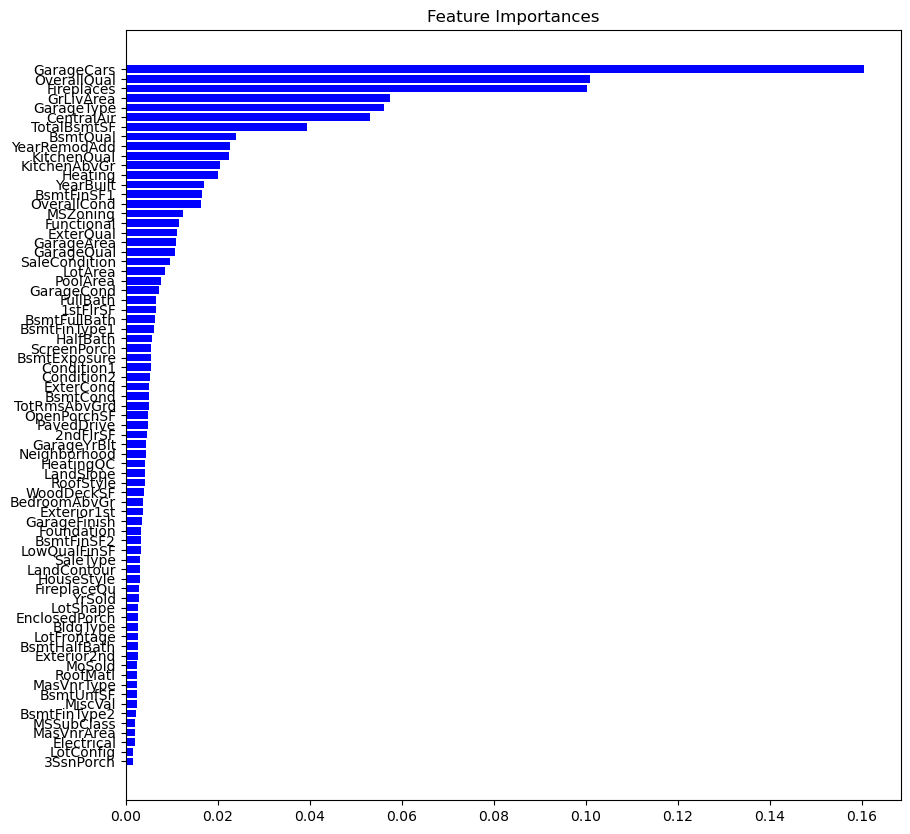

In [1182]:
importances = XGB.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices] , color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])

In [1183]:
xtest_XGB_pred=XGB.predict(X_test)
xx=XGB.predict(X)

## 訓練資料結果

In [1184]:
xx=np.expm1(xx)
y=np.expm1(y)
# plt.figure(figsize=(12,6))
# sns.distplot(xx,kde=True,hist=True)

In [1185]:
train_predict = pd.DataFrame({'predict':xx , 'correct_price': y})
train_predict

,predict,correct_price
0,206070.828125,208500.0
1,180209.703125,181500.0
2,216272.875000,223500.0
3,144156.968750,140000.0
4,269476.468750,250000.0
...,...,...
1448,173984.078125,175000.0
1449,203733.531250,210000.0
1450,263559.062500,266500.0
1451,140695.390625,142125.0


In [1186]:
mean_squared_error(y,xx),mean_absolute_error(y,xx)

(27540855.02149852, 3793.454041745529)

In [1187]:
sqrt(mean_squared_error(y,xx))

5247.9381686047445

In [1188]:
mean_squared_log_error(y,xx)

0.0007887355297250775

## 測試資料預測

In [1189]:
xtest_XGB_pred=np.expm1(xtest_XGB_pred)

In [1193]:
my_submission = pd.DataFrame({'Id': test_df.index+8, 'SalePrice': xtest_XGB_pred})

In [1194]:
my_submission

,Id,SalePrice
0,1461,124888.859375
1,1462,165646.640625
2,1463,189980.890625
3,1464,193359.906250
4,1465,186294.062500
...,...,...
1454,2915,78192.140625
1455,2916,78923.578125
1456,2917,157816.921875
1457,2918,113921.460938


In [1195]:
my_submission.to_csv('submission.csv', index=False)